In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Problème discret: Nombre finis d'individus ##

In [12]:
c = ['y', 'r', 'g', 'k', 'b']

In [13]:
seed(0)

In [14]:
N = 350
L = 26
l = 20

In [15]:
popu = {}
for i in c:
    a = zeros((2, N))
    a[0, :] = randint(L, size = N)
    a[1, :] = randint(l, size = N)
    popu[i] = a

In [16]:
def dessin(X):
    k = X.keys()
    for i in k:
        plot(X[i][0, :], X[i][1, :], i + '.')
    show()

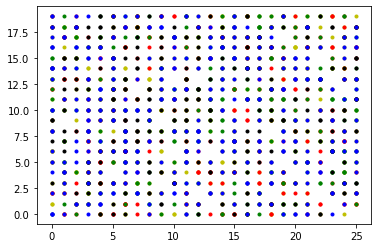

In [17]:
dessin(popu)

In [18]:
def bord(X):
    k = X.keys()
    zz = set(arange(N))
    for i in k:
        z = {}
        z = set(where(X[i][0, :] < 1)[0])
        z = z.union(set(where(X[i][0, :] > L - 2)[0]))
        z = z.union(set(where(X[i][1, :] < 1)[0]))
        z = z.union(set(where(X[i][1, :] > l - 1)[0]))
        a = list(zz.symmetric_difference(z))
        for p in z:
            b = randint(len(a))
            X[i][:, p] = X[i][:, a[b]]
    return X

In [19]:
def annulation(X):
    k = list(X.keys())
    n = len(k)
    zz = set(arange(N))
    for i in range(n):
        for j in range(i + 1, n):
            S = where(sum((X[k[i]].T[newaxis, :, :] - X[k[j]].T[:, newaxis, :]) ** 2, axis = 2 ).T == 0)
            Si = set(S[0])
            Sj = set(S[1])
            zi = zz.symmetric_difference(Si)
            zj = zz.symmetric_difference(Sj)
            Zi = list(zi)
            Zj = list(zj)
            for s in Si:
                X[k[i]][:, s] = X[k[i]][:, Zi[randint(len(Zi))]]
            for s in Sj:
                X[k[j]][:, s] = X[k[j]][:, Zj[randint(len(Zj))]]
    return X             

In [20]:
def mouvement(X):
    k = X.keys()
    for i in k:
        X[i] += around(randn(2, N)).astype(int)
    return X

In [23]:
for i in range(2000):
    popu = mouvement(popu)
    popu = annulation(popu)
    popu = bord(popu)

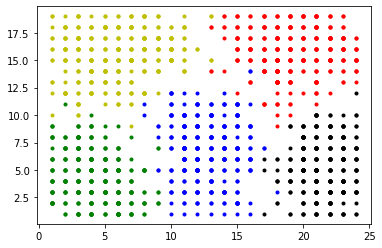

In [39]:
dessin(popu)

## Le Problème continu ##

In [25]:
M = 51
L = 1
xx = linspace(0, L, M)
yy = linspace(0, L, M)
h = L / (M - 1)
T = 1
N = 100000
k = T / (N - 1)

In [26]:
u = rand(M, M)
u = u / sum(u)
v = rand(M, M)
v = v / sum(v)
w = rand(M, M)
w = w / sum(w)

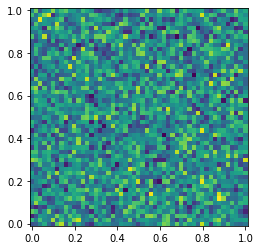

In [27]:
pcolormesh(xx, yy, u + v + w, shading='auto')
axis('image')
show()

In [28]:
e = ones(M)
ee = ones(M - 1)
La = -2 * diag(e) + diag(ee, 1) + diag(ee, -1)

eps = 0.1 * k

In [29]:
for i in range(N):
    u = (u + (k / h ** 2) * (dot(La, u) + dot(u, La))) / (1 + ((k / eps) * ((v + w))))
    v = (v + (k / h ** 2) * (dot(La, v) + dot(v, La))) / (1 + ((k / eps) * ((u + w))))
    w = (w + (k / h ** 2) * (dot(La, w) + dot(w, La))) / (1 + ((k / eps) * ((u + v))))

    u = u / sum(abs(u))
    v = v / sum(abs(v))
    w = w / sum(abs(w))

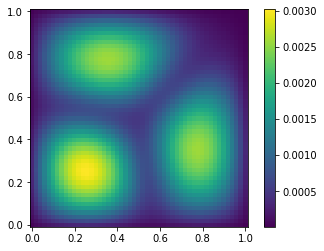

In [30]:
im = pcolormesh(xx, yy, u + v + w, shading='auto')
axis('image')
colorbar(im)
show()

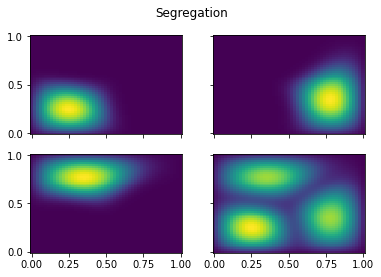

In [31]:
fig = figure()
gs = fig.add_gridspec(2, 2, hspace=0.2, wspace=0.2)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Segregation')
ax1.pcolormesh(xx, yy, u, shading='auto')
ax2.pcolormesh(xx, yy, w, shading='auto')
ax3.pcolormesh(xx, yy, v, shading='auto')
ax4.pcolormesh(xx, yy, u + v + w, shading='auto')
show()

In [32]:
u = rand(M, M)
u = u / sum(u)
v = rand(M, M)
v = v / sum(v)
w = rand(M, M)
w = w / sum(w)
x = rand(M, M)
x = x / sum(x)
y = rand(M, M)
y = y / sum(y)

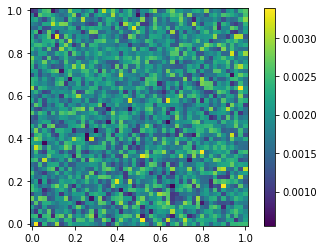

In [33]:
im = pcolormesh(xx, yy, u + v + w + x + y, shading='auto')
axis('image')
colorbar(im)
show()

In [34]:
for i in range(N):
    u = (u + (k / h ** 2) * (dot(La, u) + dot(u, La))) / (1 + ((k / eps) * ((v + w  + x + y))))
    v = (v + (k / h ** 2) * (dot(La, v) + dot(v, La))) / (1 + ((k / eps) * ((u + w  + x + y))))
    w = (w + (k / h ** 2) * (dot(La, w) + dot(w, La))) / (1 + ((k / eps) * ((u + v  + x + y))))
    x = (x + (k / h ** 2) * (dot(La, x) + dot(x, La))) / (1 + ((k / eps) * ((u + v  + w + y))))
    y = (y + (k / h ** 2) * (dot(La, y) + dot(y, La))) / (1 + ((k / eps) * ((u + v + w + x))))

    u = u / np.sum(u)
    v = v / np.sum(v)
    w = w / np.sum(w)
    x = x / np.sum(x)
    y = y / np.sum(y)


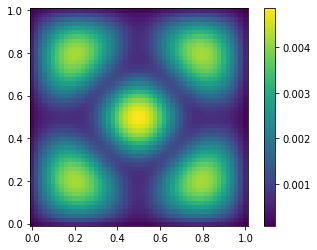

In [35]:
im = pcolormesh(xx, yy, u + v + w + x + y, shading='auto')
axis('image')
colorbar(im)
show()

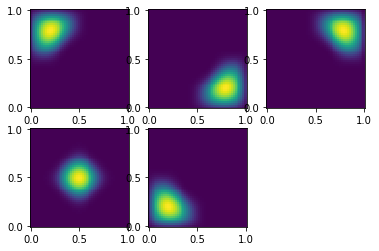

In [40]:
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)

ax1.pcolormesh(xx, yy, u, shading='auto')
ax2.pcolormesh(xx, yy, w, shading='auto')
ax3.pcolormesh(xx, yy, v, shading='auto')
ax5.pcolormesh(xx, yy, x, shading='auto')
ax4.pcolormesh(xx, yy, y, shading='auto')
plt.show()